<a href="https://colab.research.google.com/github/Vey27/NLP-and-Speech-Recognition/blob/main/gitChatbotModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CREATE CHATBOT MODEL

NLP and Speech Recognition Chatbot1




In [ ]:
## machine learning modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
## deeplearning modules
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

In [ ]:
%pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

True

In [ ]:
## for pickling
import pickle

In [ ]:
## creating lists for nlp
words=[]
classes = []
documents = []
ignore_words = ['?', '!']

In [ ]:
## read in the file
data_file = open('commands.json').read()
intents = json.loads(data_file)

In [ ]:
## function for tagging the tokens and creating a lists
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# lemmatize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))


In [ ]:
words[:10]

["'s",
 ',',
 'a',
 'adverse',
 'all',
 'anyone',
 'are',
 'awesome',
 'be',
 'behavior']

In [ ]:
# sort classes
classes = sorted(list(set(classes)))

In [ ]:
classes[:10]

['adverse_drug',
 'blood_pressure',
 'blood_pressure_search',
 'goodbye',
 'greeting',
 'hospital_search',
 'options',
 'pharmacy_search',
 'thanks']

In [ ]:
# documents = combination between patterns and intents
print(len(documents), "documents")

47 documents


In [ ]:
# words = all words, vocabulary
print(len(words), "unique lemmatized words", words)

88 unique lemmatized words ["'s", ',', 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time', 'to', 'transfer', 'up', 'want', 'what', 'which', 'with', 'you']


In [ ]:
# classes = intents
print(len(classes), "classes", classes)

9 classes ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']


In [ ]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

In [ ]:
# Training Data Creation
training = []
# Define Output Array
output_empty = [0] * len(classes)
# Training data as Bag of words for respective sentence
for doc in documents:
    # Bag of words Intialization
    bag = []
    # tokenized word list as pattern
    pattern_words = doc[0]
    # lemmatize the wordsand define the meaning
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # Creation of bag of words array with 1, if it matches in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for each pattern
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [ ]:
# Conversion to  np.array
random.shuffle(training)
training = np.array(training)

<ipython-input-254-e3520d5d35fd>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [ ]:
training_df = pd.DataFrame(training)

In [ ]:
training_df.head()

,0,1
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0]"
1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0]"


In [ ]:
# create train and test dataset
train_x = list(training_df.iloc[:, 0])
train_y = list(training_df.iloc[:, 1])
print("Training data created")

Training data created


In [ ]:
print(np.array(train_x).shape)


(47, 88)


In [ ]:
# Convert train_x to a numpy array
train_x = np.array(train_x)

# Reshape train_x
train_x = np.reshape(train_x, (train_x.shape[0], -1))


In [ ]:
# Create model - 3 layers neural network
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(90, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model.
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=50, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 1s 3ms/step - loss: 2.2234 - accuracy: 0.1064
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 2.2079 - accuracy: 0.0851
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 2.1983 - accuracy: 0.0426
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 2.1619 - accuracy: 0.2766
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 2.1284 - accuracy: 0.1277
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 2.0536 - accuracy: 0.2766
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 2.0549 - accuracy: 0.3191
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 2.0087 - accuracy: 0.2553
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 1.8696 - accuracy: 0.3191
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 1.8380 - accuracy: 0.4255
Epoch 11/50
10/10 [===========

In [ ]:
!pip install seaborn
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


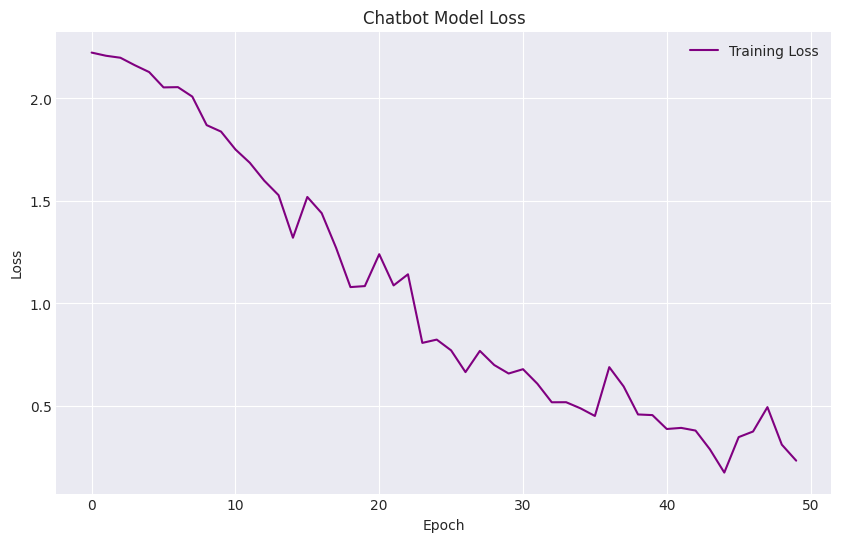

In [ ]:
# Set the style of the plot
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the training loss
plt.plot(hist.history['loss'], label='Training Loss',color='purple')

# Check if validation loss is recorded
if 'val_loss' in hist.history:
  plt.plot(hist.history['val_loss'], label='Validation Loss')

# Set the title and axis labels
plt.title('Chatbot Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


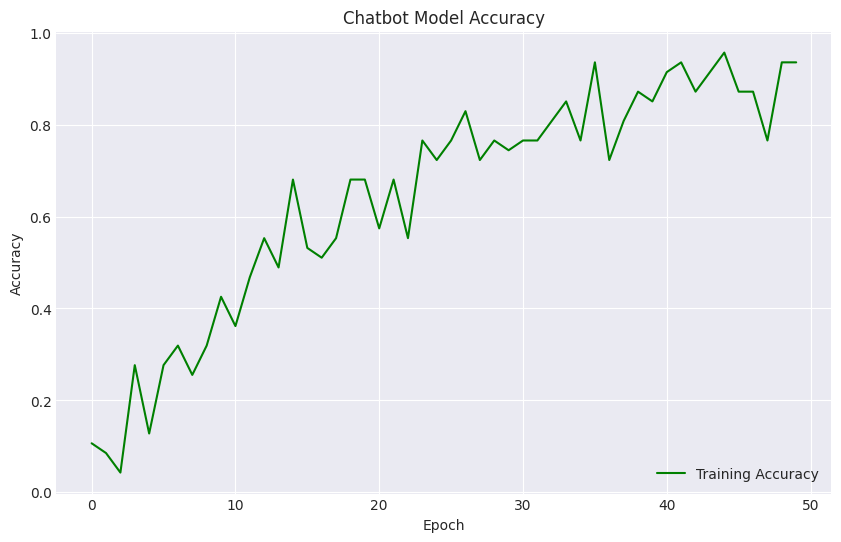

In [ ]:
# Set the style of the plot
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the training accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='Green')

# Check if validation accuracy is recorded
if 'val_accuracy' in hist.history:
  plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')

# Set the title and axis labels
plt.title('Chatbot Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()
